In [41]:
# IMporting the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.colors as mcolors
import warnings
import datetime
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

In [42]:
#Read Dataset  
pd.pandas.set_option('display.max_columns',None)
columns=['Order Date','Sales']
df=pd.read_csv('C:\\Users\\HP\\Desktop\\sales.csv',usecols=columns)
print(df.shape)
df.columns

(9800, 2)


Index(['Order Date', 'Sales'], dtype='object')

In [43]:

df['Order Date']=pd.to_datetime(df['Order Date'])
df['month']=df['Order Date'].dt.month_name()
df.set_index('month',inplace=True)
df.head()

,Order Date,Sales
month,,
August,2017-08-11,261.9600
August,2017-08-11,731.9400
December,2017-12-06,14.6200
November,2016-11-10,957.5775
November,2016-11-10,22.3680


<AxesSubplot:xlabel='month'>

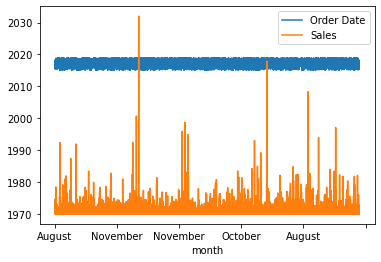

In [44]:
df.plot()

In [45]:

test_result=adfuller(df['Sales'])
def adfuller_test(Sales):
    result=adfuller(Sales)
    labels=['ADF test statistics','p value','slags used','no of observations used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=.05:
        print("strong evidence against null hyposthesis so reject null hypothesis")
    else:
        print("weak evidence agianst null hypothesis so accept null hhypothesis")
    return
adfuller_test(df['Sales'])

ADF test statistics:-98.33555319790356
p value:0.0
slags used:0
no of observations used:9799
strong evidence against null hyposthesis so reject null hypothesis


ADF test statistics:-28.08383027160523
p value:0.0
slags used:35
no of observations used:9752
strong evidence against null hyposthesis so reject null hypothesis


<AxesSubplot:xlabel='month'>

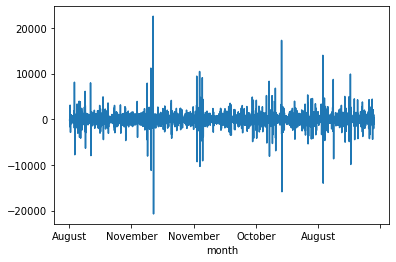

In [46]:
#difference
df['sales first difference']=df['Sales']-df['Sales'].shift(1)
df['seasonal first difference']=df['Sales']-df['Sales'].shift(12)
df.head()
adfuller_test(df['seasonal first difference'].dropna())
df['seasonal first difference'].plot()

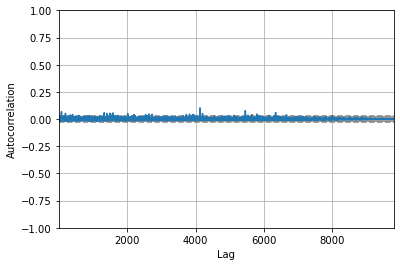

In [47]:

autocorrelation_plot(df['Sales'])
plt.show()

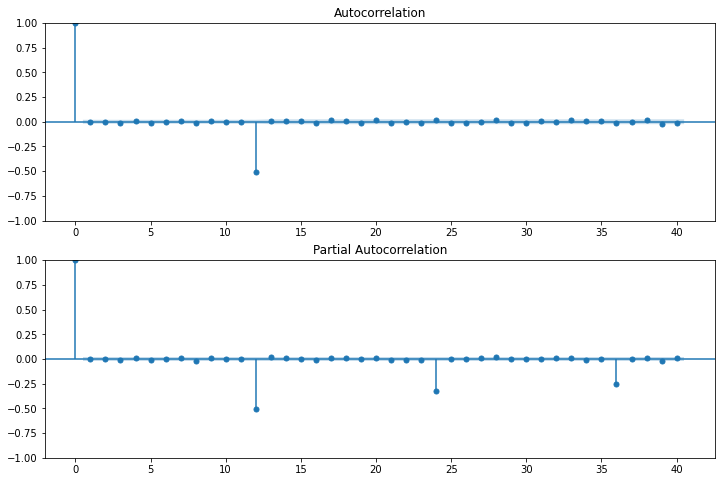

In [48]:



fig=plt.figure(figsize(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['seasonal first difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['seasonal first difference'].iloc[13:],lags=40,ax=ax2)
plt.show()

In [49]:
# ARIMA model is for non seasonal data
from statsmodels.tsa.arima_model import ARIMA 
model=sm.tsa.arima.ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()


<AxesSubplot:xlabel='month'>

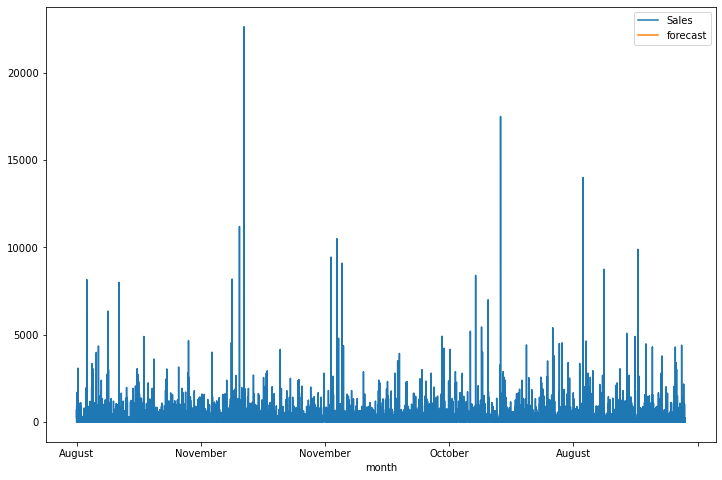

In [50]:
#SARIMAX
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()
sr=np.array(results.predict(start=90,end=103,dynamic=True))
df['forecast']=pd.Series(sr)
df[['Sales','forecast']].plot(figsize=(12,8))


<AxesSubplot:>

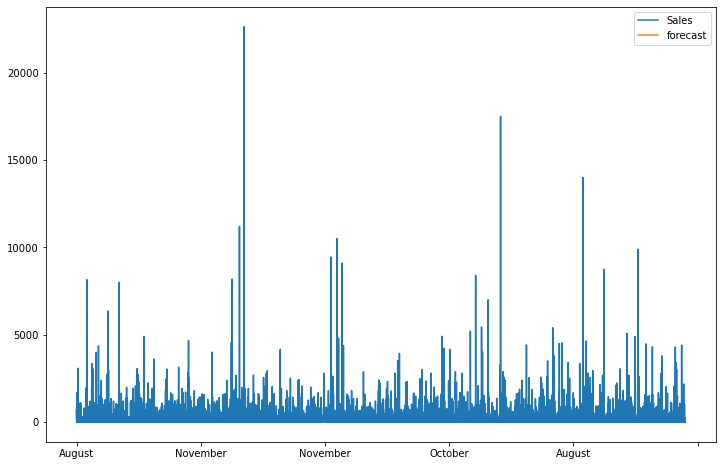

In [59]:

future_dates=[df.index[0]+str(DateOffset(months=x) for x in range(0,24))]
future_dates_tdf=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dates_tdf.tail()
future_df=pd.concat([df,future_dates_tdf])
sr=np.array(results.predict(start=104,end=120,dynamic=True))
future_df['forecast']=pd.Series(sr)
future_df[['Sales','forecast']].plot(figsize(12,8))
